<a href="https://colab.research.google.com/github/harisghafoor/Dataset/blob/main/News_Classification_Haris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:
In this project, we are going to predict the category of news article by using NLP techniques. We started off from cleaning the dataset and pre-processing the feature space. In EDA, we found the word length of each article to gain some insights and then we found the most repititive word and their importance in the articles using word-cloud. The word embedding technique also play very important role and as instructed we employed TF-IDF technique for converting text into integers. Then we built different predictive models and trained our dataset. Evaluation metrics play very important role because of the nature of dataset. As we can see in the EDA that our dataset is highly imbalanced so we cant use classification accuracy but we will use confusion matrix and classification report in order to evaluate the dataset. Our best performing models are Decision Trees,xGBclassifier and Multinomial Naive Bayes. 

# Part 1: Pre-Processing of Dataset 

### Importing the Libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost 
from sklearn import metrics
import time
from nltk.tokenize import word_tokenize 
import re
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Importing the Dataset from local Repository

In [ ]:
!git clone https://github.com/harisghafoor/Dataset.git

Cloning into 'Dataset'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


### Loading the Dataset

In [ ]:
df=pd.read_csv("Dataset/Huff_news.csv")
df.head()

### Merging the Short Description and Headline

As instructed we merge these two features to make a new feature so now we dont need to handle the missing values of short description column due to merging with the title.

In [ ]:
df["text_all"]=df["headline"].astype(str)+ " "+df["short_description"].astype(str)
df.head()

### Feature Engineering:
We dont want to make our model complex so we will drop the columns which dont have any essential impact on the target variable. For example, the author name,date and link are not important so we will drop these features.

In [ ]:
df.drop(['Unnamed: 0','headline','link','authors','short_description','date'],axis=1,inplace=True)
df.head()

,category,text_all
0,MEDIA,HuffPost's DC Chief Responds To Obama's Warnin...
1,RELIGION,Sexism: The Original Sin Of The Church
2,GOOD NEWS,Banksy Exhibit Inspires Ex-Drug Addict To Chan...
3,ARTS,Spirit of the Hawk
4,COMEDY,The Surprising Use for Big Lots Reward Cards D...


# Part 2:  Exploratory data analysis

In [ ]:
df.dtypes  # Checking the data types of the variables

category    object
text_all    object
dtype: object

Analyzing the no of artilces of each category in our dataset.

In [ ]:
labels = df.groupby('category')
print("total categories:", labels.ngroups)
print(labels.size())

total categories: 27
category
ARTS               879
BLACK VOICES       435
BUSINESS          1468
COLLEGE            426
COMEDY             639
CRIME              542
EDUCATION          361
ENTERTAINMENT     2172
FIFTY              729
GOOD NEWS          340
GREEN              881
HEALTHY LIVING    2245
IMPACT            1070
LATINO VOICES      136
MEDIA              528
PARENTS           1043
POLITICS          3539
QUEER VOICES       899
RELIGION           901
SCIENCE            389
SPORTS             809
STYLE              603
TASTE              582
TRAVEL             787
WEIRD NEWS         361
WOMEN              832
WORLDPOST         1404
dtype: int64


In [ ]:
df.isnull().any() # Checking the missing values

category    False
text_all    False
dtype: bool

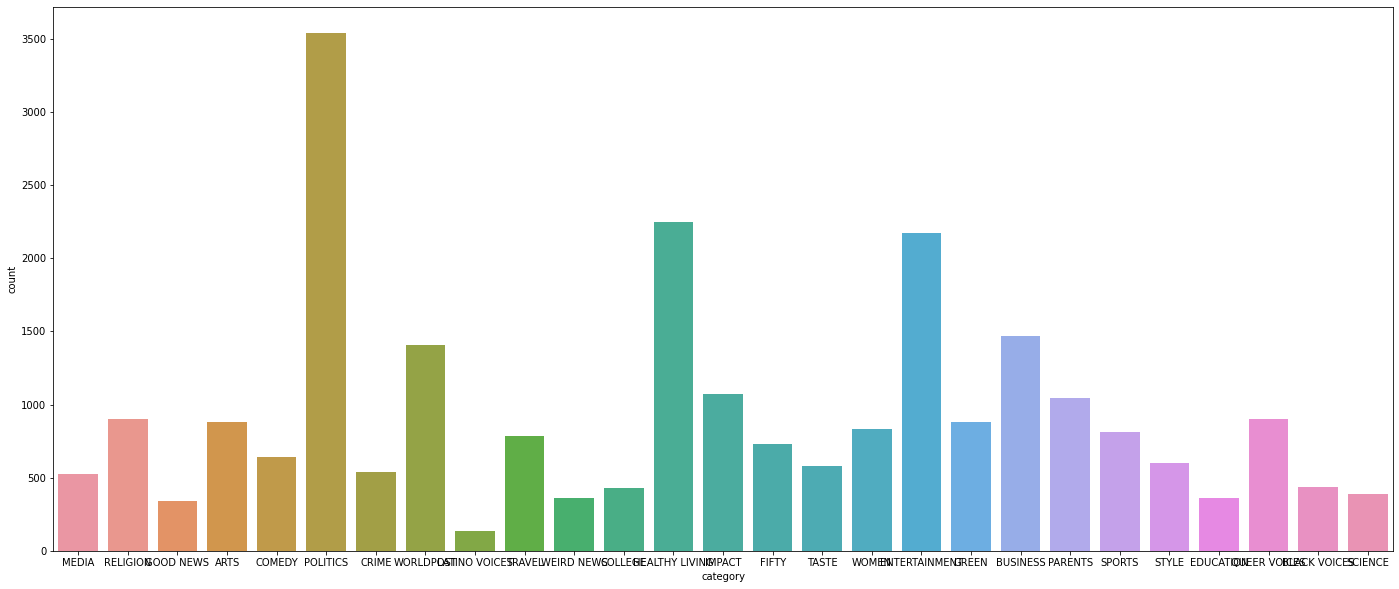

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24, 10))  
# drawing the plot
sns.countplot(df.category)
plt.show()


As we can see in the above plot that data is highly imbalanced . So we need to use proper evaluation metrics. We have the option of upsampling the dataset by SMOTE but according to the literature review, upsampling will overfit the data and will destroy the generealization of our models on valuation sets.

### Wordcloud
We will see the important and popular words in our dataset and visualize them using library wordcloud.

In [ ]:
text = " ".join(df.Text_processed)
wordcloud = WordCloud().generate(text)
plt.figure()
plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
    background_color="white",
    max_words=len(text),
    max_font_size=40,
    relative_scaling=.5).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Cleaning the Dataset
First we will remove all the unwanted spaces, punctuation, numbers and special characters using the fucntion made by [(https://github.com/DiveshRKubal)]. We downloaded the stopwords from library nltk and tokenize our text.

In [ ]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)  
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    text = " ".join(filtered_sentence)
    return text

In [28]:
df['Text_processed'] = df['text_all'].apply(process_text)
df.head()

,category,text_all,Text_processed
0,MEDIA,HuffPost's DC Chief Responds To Obama's Warnin...,huffposts dc chief responds obamas warning rea...
1,RELIGION,Sexism: The Original Sin Of The Church,sexism original sin church
2,GOOD NEWS,Banksy Exhibit Inspires Ex-Drug Addict To Chan...,banksy exhibit inspires exdrug addict change l...
3,ARTS,Spirit of the Hawk,spirit hawk
4,COMEDY,The Surprising Use for Big Lots Reward Cards D...,surprising use big lots reward cards dear husb...


## Label Encoding the Target Variable 
In order to convert the target variable into 'int' data types, we can perform one hot encoding, label encoding etc. The reason of choosing it is that label encoding is computationally efficient and takes less time than one hot encoding.

In [29]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Category_encoded']= label_encoder.fit_transform(df['category']) 
df.head()

,category,text_all,Text_processed,Category_encoded
0,MEDIA,HuffPost's DC Chief Responds To Obama's Warnin...,huffposts dc chief responds obamas warning rea...,14
1,RELIGION,Sexism: The Original Sin Of The Church,sexism original sin church,18
2,GOOD NEWS,Banksy Exhibit Inspires Ex-Drug Addict To Chan...,banksy exhibit inspires exdrug addict change l...,9
3,ARTS,Spirit of the Hawk,spirit hawk,0
4,COMEDY,The Surprising Use for Big Lots Reward Cards D...,surprising use big lots reward cards dear husb...,4


In [30]:
df.to_csv('Dataset/cleaned_data.csv') # Saving the cleaned dataset.

### Word Embedding Technique:
Now converting text into numbers using TF-IDF method. There are many parameters that we havent specified just to make our analysis open and tune them later if needed.

In [38]:
X=df.Text_processed
Y=df.Category_encoded
X.dtype,Y.dtype

(dtype('int64'), dtype('O'))

In [44]:
tf_vec = TfidfVectorizer()
X_features = tf_vec.fit(X)
X_features = tf_vec.transform(X)
print(X_features[0:10][0:10])

  (0, 36333)	0.35134548891466166
  (0, 30736)	0.3613931925157065
  (0, 28233)	0.37601402624939084
  (0, 27314)	0.2947810131268943
  (0, 23281)	0.3022258395071549
  (0, 16286)	0.44387311312928873
  (0, 8837)	0.3411900847178391
  (0, 6364)	0.335997681021119
  (1, 30661)	0.5417042343328496
  (1, 30112)	0.5305609384441003
  (1, 23818)	0.4909477264117526
  (1, 6523)	0.428989443966058
  (2, 19502)	0.18282503386729568
  (2, 17281)	0.3750619692129353
  (2, 11985)	0.3750619692129353
  (2, 11947)	0.46841985149538745
  (2, 6127)	0.21294745785816482
  (2, 3381)	0.43730055740123674
  (2, 2617)	0.2534822917745222
  (2, 1214)	0.40618126330708604
  (3, 31622)	0.5973078106231994
  (3, 15421)	0.8020120818095698
  (4, 35572)	0.15891533343786776
  (4, 32772)	0.19794423698823702
  (4, 30908)	0.4970484269703846
  :	:
  (9, 35782)	0.343883416103843
  (9, 34836)	0.17605253730839646
  (9, 33108)	0.12335470924981977
  (9, 33096)	0.1016599016957629
  (9, 32630)	0.1448534749186033
  (9, 31574)	0.2935964369876087


# Part 3: Model Building and Evaluation

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X_features, 
                                                    df['Category_encoded'], 
                                                    test_size=0.25, 
                                                    random_state=8)

We used the following script from [(https://github.com/nadaalay/News-Articles-Categorization)]. There is a general fucntion which takes multiple models to fit the training data and then make some predictions.

In [52]:
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of the model training time and classification report
    """
    results ={}
    
    # Start time
    start = time.time()
    # Train the model
    model.fit(train_features, y_train)
    # End time
    end = time.time()
    # Calculate the training time
    results['train_time'] = end - start
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report
    results['classification_report'] = classification_report(y_test, test_predicted)
        
    return results

In [ ]:
sv = svm.SVC()
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)
xgb = xgboost.XGBClassifier(random_state = 1)
tree = DecisionTreeClassifier()
nb = MultinomialNB()


# Fit and evaluate models
results = {}
for cls in [sv, ab, gb, xgb, tree, nb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, x_train, y_train, x_test, y_test)

In [76]:
for res in results:
    print (res)
    print()
    for i in results[res]:
        print (i, ':')
        print(results[res][i])
        print()
    print ('-----')
    print()


SVC

train_time :
167.99007868766785

classification_report :
              precision    recall  f1-score   support

           0       0.70      0.25      0.37       201
           1       0.59      0.11      0.19       117
           2       0.70      0.38      0.49       405
           3       0.60      0.30      0.40       100
           4       0.71      0.10      0.17       153
           5       0.63      0.27      0.38       141
           6       0.64      0.25      0.36       112
           7       0.39      0.82      0.53       535
           8       0.74      0.14      0.23       185
           9       1.00      0.01      0.02        87
          10       0.67      0.34      0.45       214
          11       0.36      0.79      0.49       537
          12       0.52      0.16      0.24       272
          13       0.00      0.00      0.00        40
          14       0.74      0.21      0.33       119
          15       0.57      0.48      0.52       265
          16       

# Results Analysis:
As discussed earlier, the conventional evaluation metrics fail in evaluating the imbalanced dataset classification. We can use precision and recall as a metric to to analyze the performance of our model.
  Moreover we can see that certain models perform poorly such as DecisionTrees and RandomForest becuase these modles tend to give better result for major classes. While MultinomialNb and SVM perform better because they perfom better for minority classes. 